# Neural Network Regularization

## Task G
- Train a neural net and prevent overﬁtting by regularization. 
- You can use any combination of regularizers we saw in class. 
- Use the train and test splits in the data do evaluate the model.


### Import

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

Using TensorFlow backend.


### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Cleaning and Normalization

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Convert class vectors to binary class matrices

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
input_shape = (32, 32, 3)

### Build Model

In [5]:
#Creating a sequential model
model = Sequential()

#Convolutional layers
model.add( Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', use_bias = 'true', activation = 'relu', input_shape =(32,32,3) ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add(Dropout(rate=0.5))

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'tanh' ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add(Dropout(rate=0.5))

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu' ) )

#Converting data
model.add(Flatten())  

#Fully connected layers

model.add(Dense(units=64, activation='relu'))

#Output layer
model.add(Dense(units=10, activation='softmax'))

#Finalizing and preparing the model for training
model.compile(
              loss = 'kullback_leibler_divergence',
              #loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Showing the summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)  

### Train Model

In [6]:
train1 = model.fit(x_train, y_train,
          batch_size=500,
          epochs=20,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
         )

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 57s 1ms/step - loss: 1.9269 - acc: 0.2956 - val_loss: 1.8792 - val_acc: 0.3258
Epoch 2/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5467 - acc: 0.4456 - val_loss: 1.7163 - val_acc: 0.4169
Epoch 3/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.3899 - acc: 0.5036 - val_loss: 1.7372 - val_acc: 0.4153
Epoch 4/20
50000/50000 [==============================] - 60s 1ms/step - loss: 1.2783 - acc: 0.5439 - val_loss: 1.8315 - val_acc: 0.3967
Epoch 5/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.1899 - acc: 0.5749 - val_loss: 1.7636 - val_acc: 0.4301
Epoch 6/20
50000/50000 [==============================] - 59s 1ms/step - loss: 1.1419 - acc: 0.5945 - val_loss: 1.8367 - val_acc: 0.4223
Epoch 7/20
50000/50000 [==============================] - 59s 1ms/step - loss: 1

In [7]:
train2 = model.fit(x_train, y_train,
          batch_size=250,
          epochs=5,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 71s 1ms/step - loss: 0.8142 - acc: 0.7148 - val_loss: 1.0723 - val_acc: 0.6424
Epoch 2/5
50000/50000 [==============================] - 71s 1ms/step - loss: 0.7881 - acc: 0.7238 - val_loss: 1.1178 - val_acc: 0.6451
Epoch 3/5
50000/50000 [==============================] - 72s 1ms/step - loss: 0.7688 - acc: 0.7302 - val_loss: 0.9939 - val_acc: 0.6731
Epoch 4/5
50000/50000 [==============================] - 70s 1ms/step - loss: 0.7510 - acc: 0.7358 - val_loss: 1.0377 - val_acc: 0.6610
Epoch 5/5
50000/50000 [==============================] - 70s 1ms/step - loss: 0.7254 - acc: 0.7467 - val_loss: 0.9630 - val_acc: 0.6810


In [8]:
train3 = model.fit(x_train, y_train,
          batch_size=1028,
          epochs=7,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 56s 1ms/step - loss: 0.6685 - acc: 0.7666 - val_loss: 1.0788 - val_acc: 0.6612
Epoch 2/7
50000/50000 [==============================] - 57s 1ms/step - loss: 0.6480 - acc: 0.7723 - val_loss: 1.0896 - val_acc: 0.6639
Epoch 3/7
50000/50000 [==============================] - 56s 1ms/step - loss: 0.6320 - acc: 0.7783 - val_loss: 1.0795 - val_acc: 0.6659
Epoch 4/7
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6306 - acc: 0.7775 - val_loss: 1.0093 - val_acc: 0.6788
Epoch 5/7
50000/50000 [==============================] - 57s 1ms/step - loss: 0.6249 - acc: 0.7791 - val_loss: 1.0498 - val_acc: 0.6788
Epoch 6/7
50000/50000 [==============================] - 57s 1ms/step - loss: 0.6238 - acc: 0.7797 - val_loss: 1.0588 - val_acc: 0.6761
Epoch 7/7
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6139 - acc: 0.7846 - val_loss: 1.0288 - val_acc: 0.680

### Test Model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.028835597229004
Test accuracy: 0.68


### Results

In [10]:
a1 = train1.history['acc'][-1]
v1 = train1.history['val_acc'][-1]
a2 = train2.history['acc'][-1]
v2 = train2.history['val_acc'][-1]
a3 = train3.history['acc'][-1]
v3 = train3.history['val_acc'][-1]

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['1. train', '2. train', '3.train']
accuracy = [a1,a2,a3]
val_accuracy = [v1,v2,v3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='Validation Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by training and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
train_loss = np.concatenate((train1.history['loss'], train2.history['loss'], train3.history['loss']))
val_loss = np.concatenate((train1.history['val_loss'],train2.history['val_loss'],train3.history['val_loss']))
train_acc = np.concatenate((train1.history['acc'], train2.history['acc'], train3.history['acc']))
val_acc = np.concatenate((train1.history['val_acc'],train2.history['val_acc'],train3.history['val_acc']))

In [13]:
import matplotlib.pyplot as plt
import numpy as np

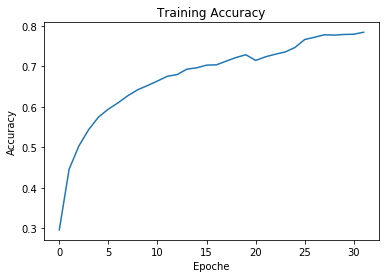

In [14]:
plt.plot(train_acc)
plt.title("Training Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

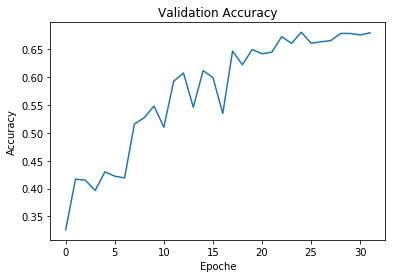

In [15]:
plt.plot(val_acc)
plt.title("Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

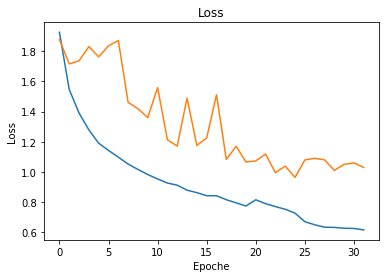

In [16]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.show()

Wie im vergeleich unserer Loss Function und der Abbildung aus der Vorlesung zu sehen ist dieses Modell nicht overfitted sondern im Bereich der Generalisation. 
Dies haben wir erreich indem wir das Model angepasst haben und Dropout Layers hinzugefügt haben, also Layers die mit einer Wahrscheinlichkeit von in unserem Fall 50% Werte aus der Bewertung rausfallen lassen. Dies für dazu, dass der Zufall nicht so leicht gelernt werden kann aber auch zu einer höheren Fluktuation der Graphen. 
Außerdem haben wir eine andere Loss Function gewählt, die höhere Strafen für extreme Weights verwendet um einen Weight decay zu verhindern. 
Auch haben wir die Epochen reduziert um den richtigen Moment abzupassen und Generalisation zu gewährleisten. 
Wir haben während diesem Prozess auchmit Batch Normalization rumprobiert aber keine guten Ergebnisse erzielen können und es deshalb wieder rausgeschmissen.

<img src="graph_overfitting.JPG" style="width:400px;height:400px"/>